In [1]:
import numpy as np
import scipy.stats as sci
import matplotlib.pyplot as plt
import time

def driftmodeling(flynum, numberofbins, numberofdays, prefmean, prefvariance, envimean, envivariance, driftvariance, gain, per, deathrate, birthrate, matureage):
    x=np.linspace(-1,1,numberofbins)
    maxage=30
    pref=np.zeros((numberofbins,numberofdays,maxage))
    pref[:,0,0]=sci.norm.pdf(x,prefmean,prefvariance) # A gaussian of preference with center around 0
    pref[:,0,0]=pref[:,0,0]/np.sum(pref[:,0,0])*flynum # total # of flies=flynum
    #envi=gain*np.sin(x*2*np.pi/per+182*2*np.pi)+envimean
    # envi=gain*np.sin(x*2*np.pi/per+2*np.pi)+envimean
    # x=np.linspace(0, numberofdays, numberofbins)
    # envi=np.sin(x)+envimean
    # print(np.max(envi))
    envi=np.zeros((numberofbins,numberofdays))
    envi[:,0]=sci.norm.pdf(x,envimean,envivariance) # A gaussian of environment with center around 0
    # print(np.max(envi))
    envi=envi/(np.max(envi))*deathrate
    driftadvantage=np.zeros((numberofdays))
    for t in range(1,numberofdays):
        envi[:,t]=sci.norm.pdf(x,(envimean+gain*np.sin(t*np.pi*2/per)),envivariance)
        envi[:,t]=envi[:,t]/np.max(envi[:,t])*.95
        # print(driftadvantage[t])
        driftadvantage[t]=np.sum(np.multiply(np.sum(pref[:,t-1],1), envi[:,t]))
        tic=time.perf_counter()
        for a in range(maxage):
            for b in range(numberofbins):
                pref[:,t,a]+=pref[b,t-1,a]*sci.norm.pdf(x,x[b],driftvariance)/np.sum(sci.norm.pdf(x,x[b],driftvariance))
                pref[:,t,a]=np.multiply(pref[:,t,a], envi[:,t]) # Multiplying the preference to the environment
        toc=time.perf_counter()
        
        tik=time.perf_counter()
        driftadvantage[t]=np.sum(np.multiply(np.sum(pref[:,t],1), envi[:,t]))-driftadvantage[t]
        for a in range(maxage):
                if a>10:
                    pref[:,t,0]=pref[:,t,0]+pref[:,0,a]*birthrate/flynum*np.sum(pref[:,t,a])
        pref[:,t,1:]=pref[:,t,:-1]
        pref[:,t,0]=0
        plt.pcolormesh(np.log(pref[:,t,:]))
        plt.show()
        tok=time.perf_counter()
        print(toc-tic)
        print(tok-tik)
          
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1)
    fig.set_figwidth(8)
    fig.set_figheight(8)
    fig.tight_layout()
    plt.subplots_adjust(hspace=.6)
    c=ax0.pcolormesh(envi)
    fig.colorbar(c,ax=ax0)
    ax0.set_title('Environment (color is fraction of flies of given pref survive)')
    ax0.set_ylabel('Preference')
    ax0.set_xlabel('Day')

    c=ax1.pcolormesh(np.sum(pref,axis=2))
    fig.colorbar(c,ax=ax1)
    ax1.set_title('Fly Preference (color is log(num) flies each day)')
    ax1.set_ylabel('Preference')
    ax1.set_xlabel('Day')

    ax2.plot(np.log(np.sum(pref,axis=(0,2))))
    ax2.set_title('total log(num) flies)')
    ax2.set_ylabel('log(num) flies)')
    ax2.set_xlabel('Day')
    ax2.set_xlim(0,numberofdays)

    ax3.plot(driftadvantage/np.sum(pref,axis=(0,2)))
    ax3.set_title('Change in death rate due to drift ')
    ax3.set_ylabel('∆surviving flies/total flies')
    ax3.set_xlabel('Day')
    ax3.set_xlim(0,numberofdays)

    fig.colorbar(c,ax=ax2)
    fig.colorbar(c,ax=ax3)

    fig.suptitle('Bet-hedge variance: '+str(prefvariance)+', Drift variance: '+str(driftvariance), y=-.05, fontsize=16)

    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


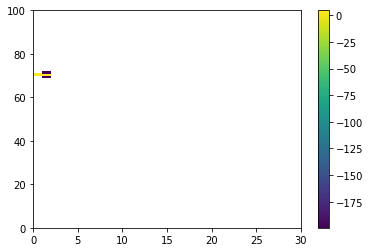

In [44]:
numberofbins=100
prefmean=.9
prefvariance=10
envimean=.1
envivariance=.1
driftvariance=.001
b=99

x=np.linspace(-1,1,100)
pref=np.zeros((100,30))
# pref[:,0]=sci.norm.pdf(x,prefmean,prefvariance) # A gaussian of preference with center around 0
# pref[:,0]=pref[:,0]/np.sum(pref[:,0])
pref[70,0]=100
# envi=np.zeros((100,30))
# envi[:,0]=sci.norm.pdf(x,envimean,envivariance) # A gaussian of environment with center around 0
# print((envi))
#envi=envi/(np.max(envi))

for b in range(numberofbins):
    pref[:,1]+=pref[b,0]*sci.norm.pdf(x,x[b],driftvariance)/np.sum(sci.norm.pdf(x,x[b],driftvariance))
# pref[:,0]=np.multiply(pref[:,0], envi[:,0])

c=plt.pcolormesh(np.log(pref))
plt.colorbar(c)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


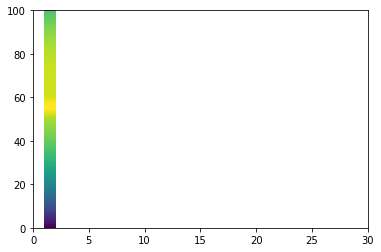

0.6862156509999977
0.1384910919999811


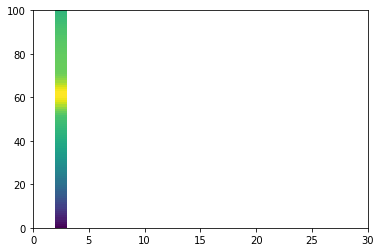

0.7459071650000624
0.11073624000005111


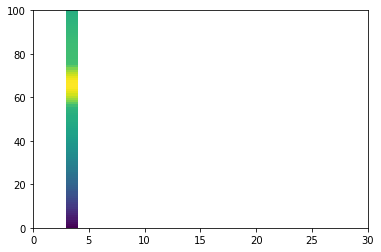

0.6789328659999683
0.12271771599989734


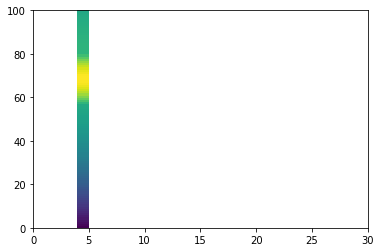

0.6754329390000748
0.12616851400002815


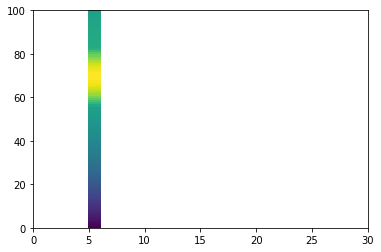

0.8024045519999845
0.12978602999999111


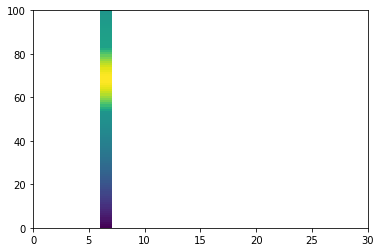

0.7197007720000101
0.12518149099992115


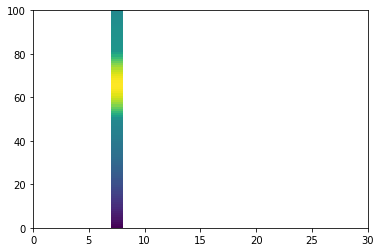

0.6961476389999461
0.1183999650000942


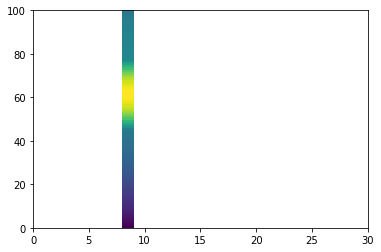

0.7334663109999155
0.11336271300001499


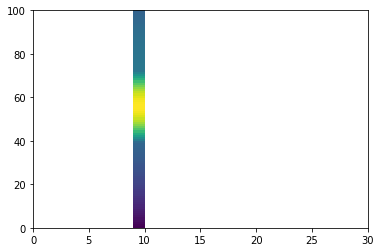

0.6905865999999605
0.1274183749999338


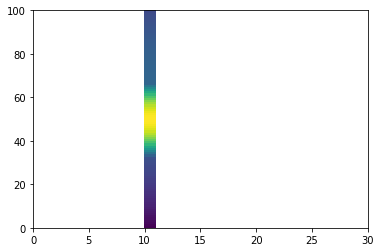

0.7579613950000521
0.2682685809999157


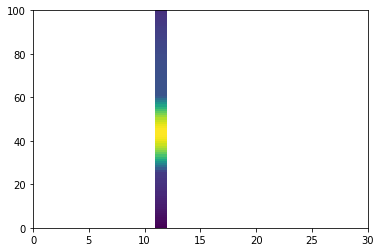

0.7652373299999908
0.12914670600002864


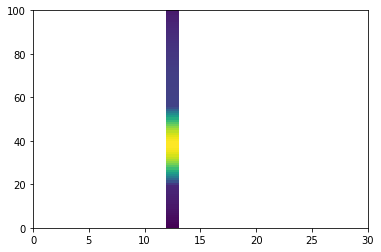

0.7267890189999662
0.10832972900004734


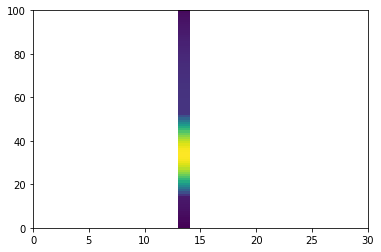

0.6692805120000003
0.10833126199997878


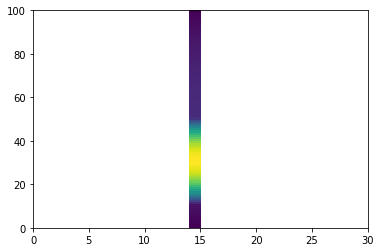

0.6889094779999141
0.1074676969999473


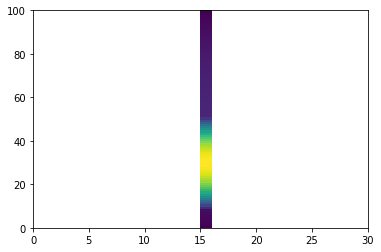

0.7387946449999845
0.11093092099997648


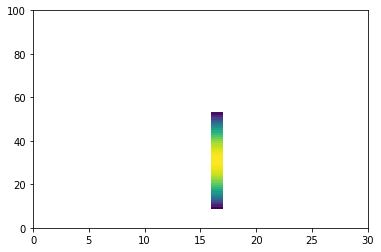

0.7499037649999991
0.11594400399997085


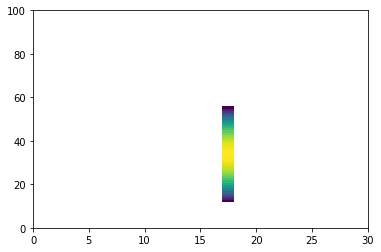

0.6986390469999151
0.12047646600001372


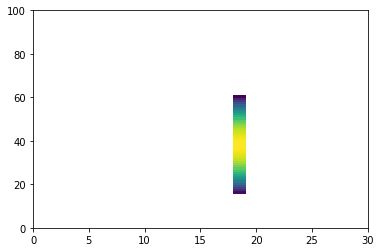

0.6989049539999996
0.12695783799995297


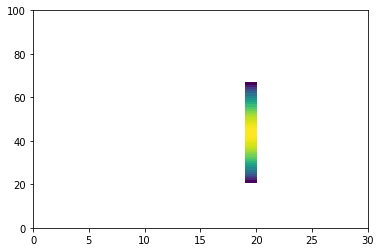

0.7241135369999938
0.11680698899999697


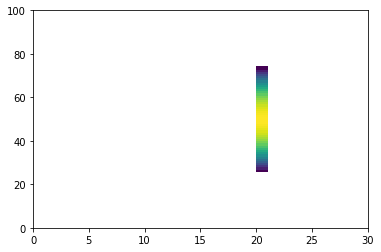

0.7217826170000308
0.12226503200008665


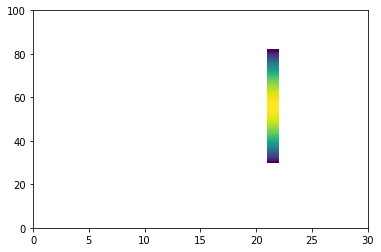

0.7372597169999153
0.1523763189999272


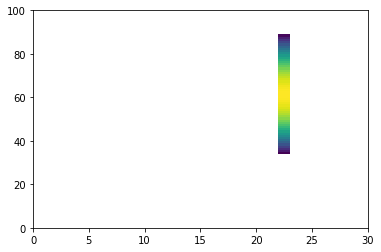

0.7041477579999764
0.1123936499999445


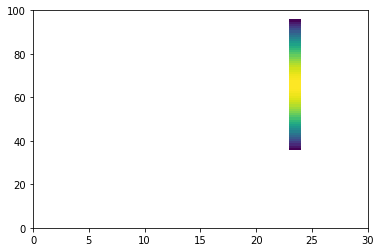

0.7678319010000223
0.1399857379999503


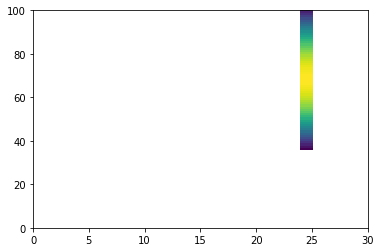

0.6760668340000393
0.10835828500000844


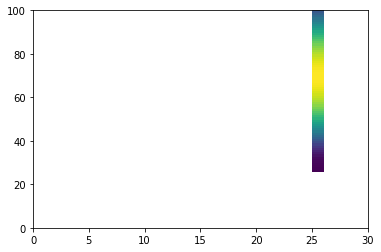

0.6560774120000588
0.10753939500000342


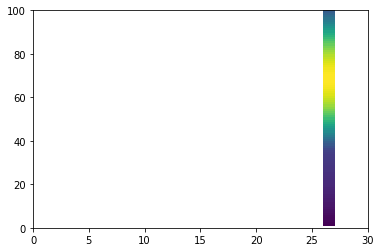

0.6994432980000056
0.1446249320000561


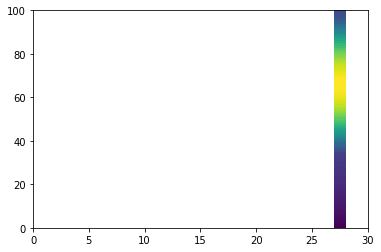

0.7922651039999664
0.12100082000006296


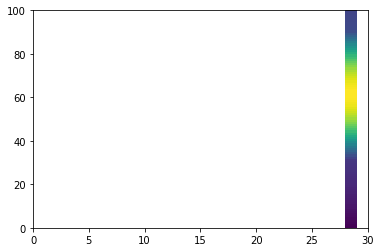

0.6781059300000152
0.1305282380000108


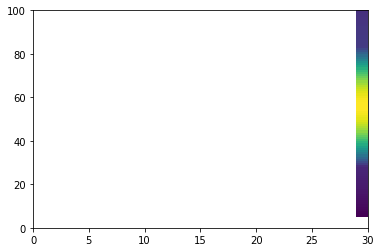

0.7918571510000447
0.1087516399999231


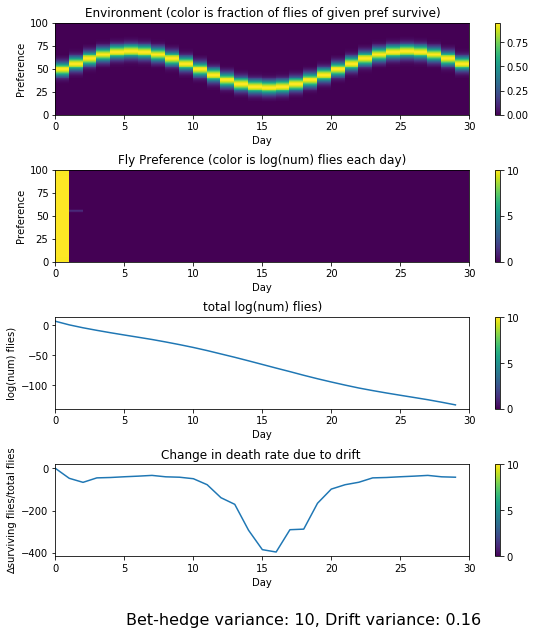

In [7]:
#driftmodeling(flynum, numberofbins, numberofdays, prefmean, prefvariance, envimean, envivariance, driftvariance, gain, per)
flynum=1000
numberofbins=100
numberofdays=30
prefmean=0
prefvariance=10
envimean=0
envivariance=.1
#envivariance=1/((2*np.pi)-0.0001)
driftvariance=0.16
gain=.4
per=20
deathrate=.95
birthrate=1.05
matureage=10
driftmodeling(flynum, numberofbins, numberofdays, prefmean, prefvariance, envimean, envivariance, driftvariance, gain, per,deathrate,birthrate,matureage)